In [2]:
%load_ext autoreload
%autoreload 2
import SRtools as srt
from SRtools import sr_mcmc as srmc
from SRtools import SRmodellib as sr
from SRtools import samples_utils as su
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
npz_path ='posterior_csvs/DROSOPHILA/drosophila_217_post_data.npz'
raw_data = su.load_raw_data_from_npz(npz_path)


In [4]:
samples = np.array(raw_data['samples'])
lnprobs = np.array(raw_data['lnprobs'])
best_sample  = samples[np.argmax(lnprobs)]

Averaging log-probabilities: 100%|██████████| 18421/18421 [00:00<00:00, 408303.51it/s]


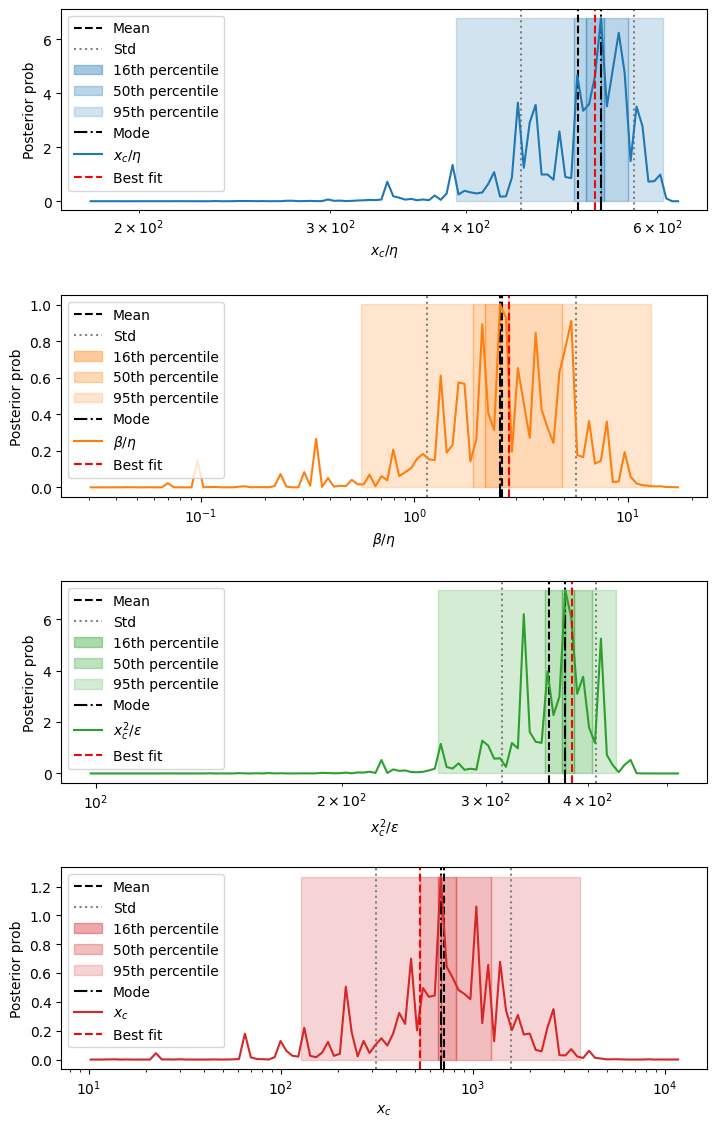

In [5]:
config_dict = None
help_text =None
post = su.Posterior(samples, lnprobs, 100, log=True,config_params=config_dict,help_text=help_text,sorting =True)
post.plot_1d_posteriors(labels=["$x_c/\\eta$","$\\beta/\\eta$","$x_c^2/\\epsilon$","$x_c$"], truths=best_sample,scale='log')

Creating corner plot: 100%|██████████| 4/4 [00:05<00:00,  1.38s/it]


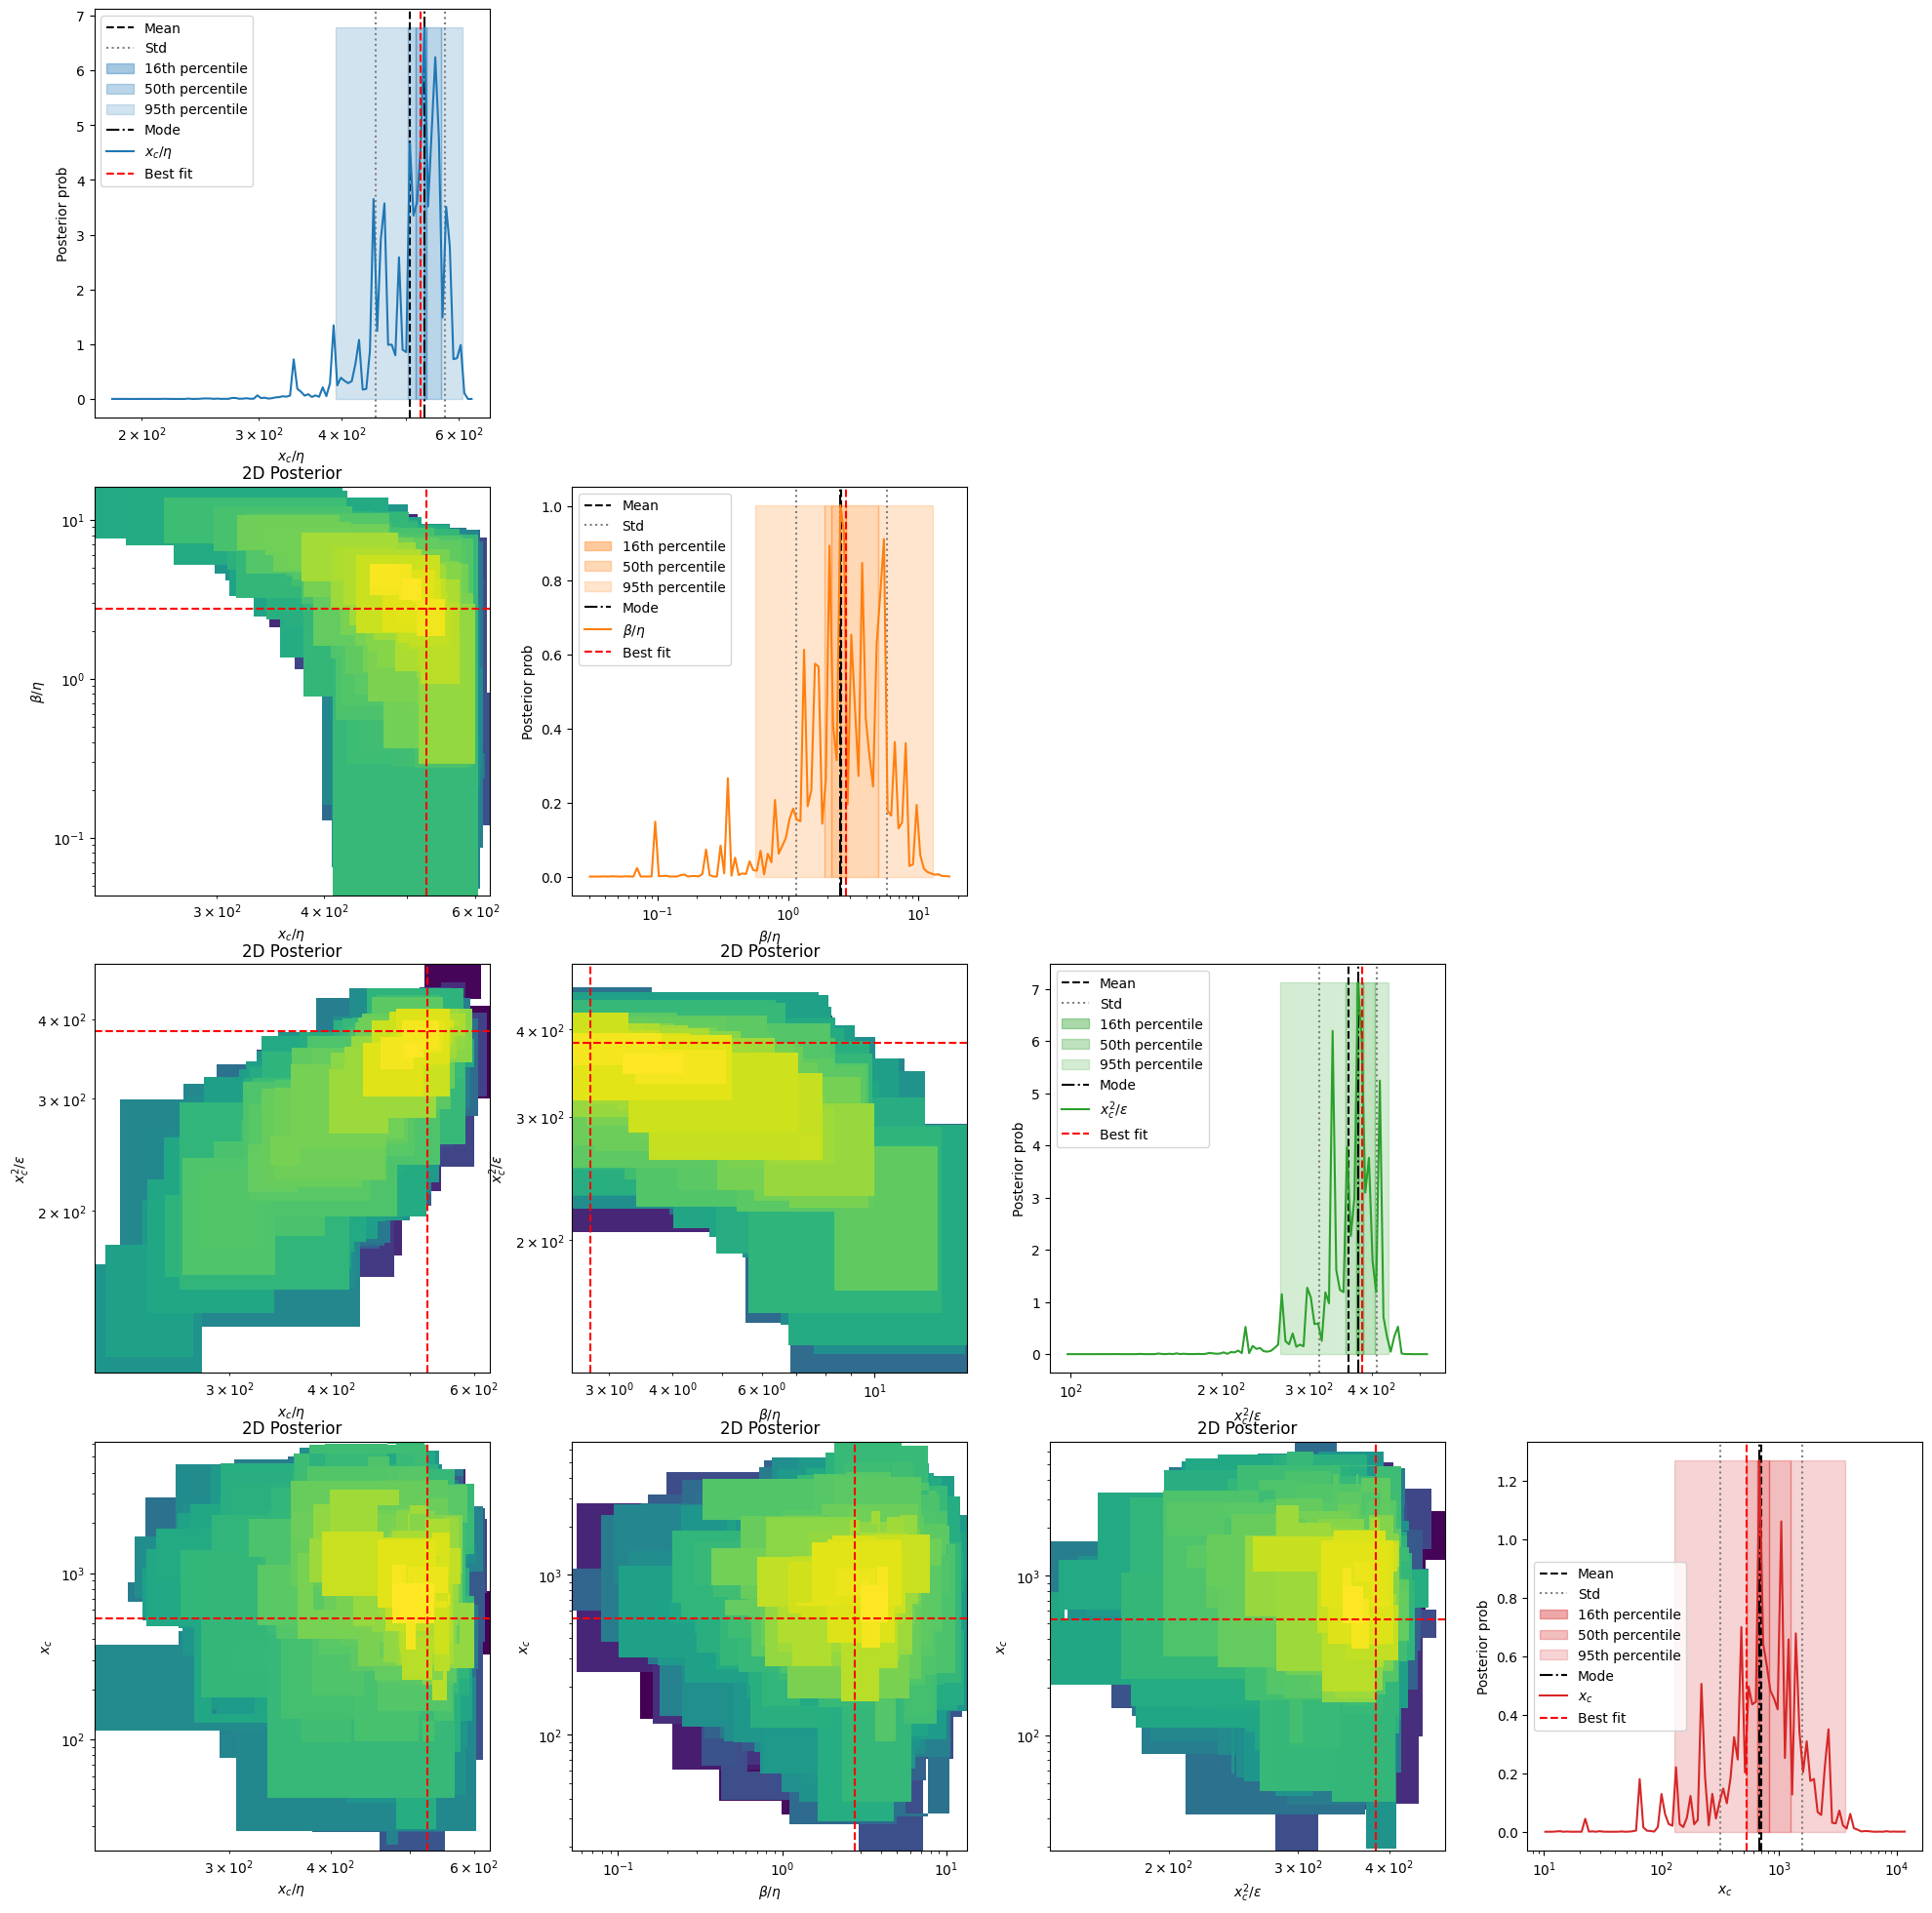

In [44]:
_=post.corner_plot(labels=["$x_c/\\eta$","$\\beta/\\eta$","$x_c^2/\\epsilon$","$x_c$"], truths=best_sample,scale='log',show_ln_prob=False,norm='log',plot_type="pcolormesh")

In [30]:
theta = [1.81272085, 0.44684116 ,1.75693635, 1.86470129]
#find the sample theta in post.unique_samples
theta = np.array(theta)
unique_samples = post.unique_samples
theta_index = np.where(np.all(unique_samples == theta, axis=1))[0]
print(f"theta_index: {theta_index}")
print(post.log)

theta_index: []
[True, True, True, True]


In [39]:
post1 = su.Posterior(samples, lnprobs, 100, log=True,config_params=config_dict,help_text=help_text,sorting =True,prior =post)


Calculating prior for posterior bins: 100%|██████████| 18421/18421 [00:13<00:00, 1376.49it/s]


In [121]:
post1.save_to_file('test_prior')
pl=su.Posterior.load_from_file('test_prior')

In [122]:
print(pl.prior)
print(post1.prior)

True
True


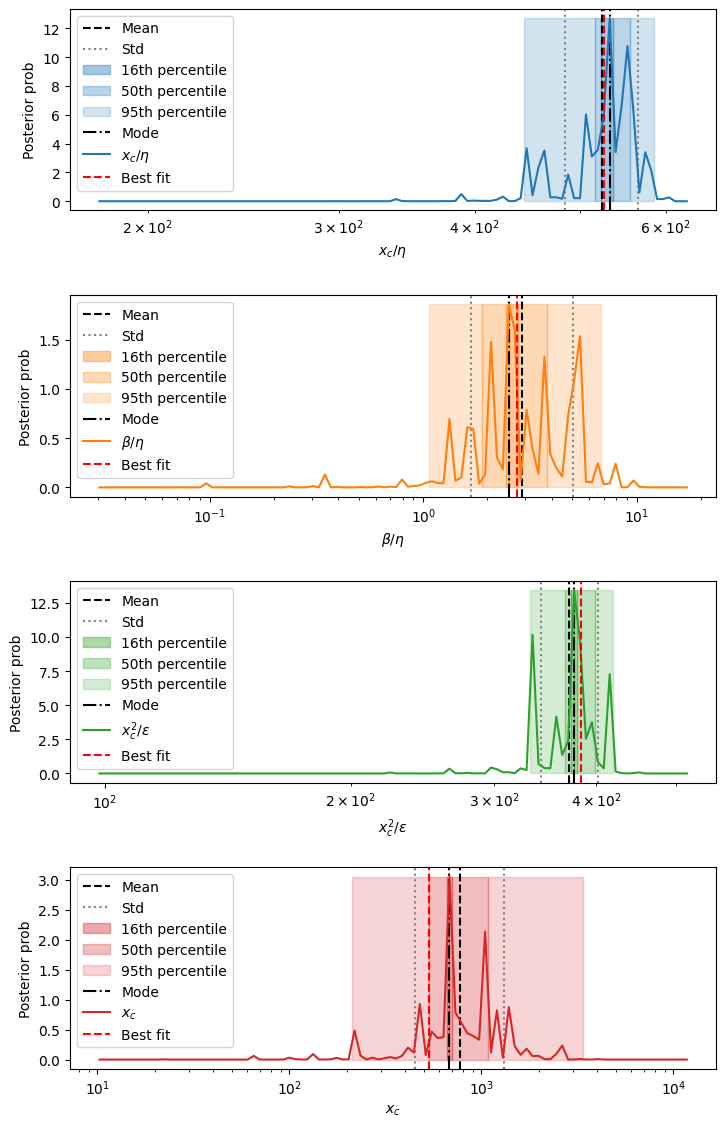

In [123]:
pl.plot_1d_posteriors(labels=["$x_c/\\eta$","$\\beta/\\eta$","$x_c^2/\\epsilon$","$x_c$"], truths=best_sample,scale='log')

Calculating prior for posterior bins: 100%|██████████| 98/98 [00:00<00:00, 30154.93it/s]


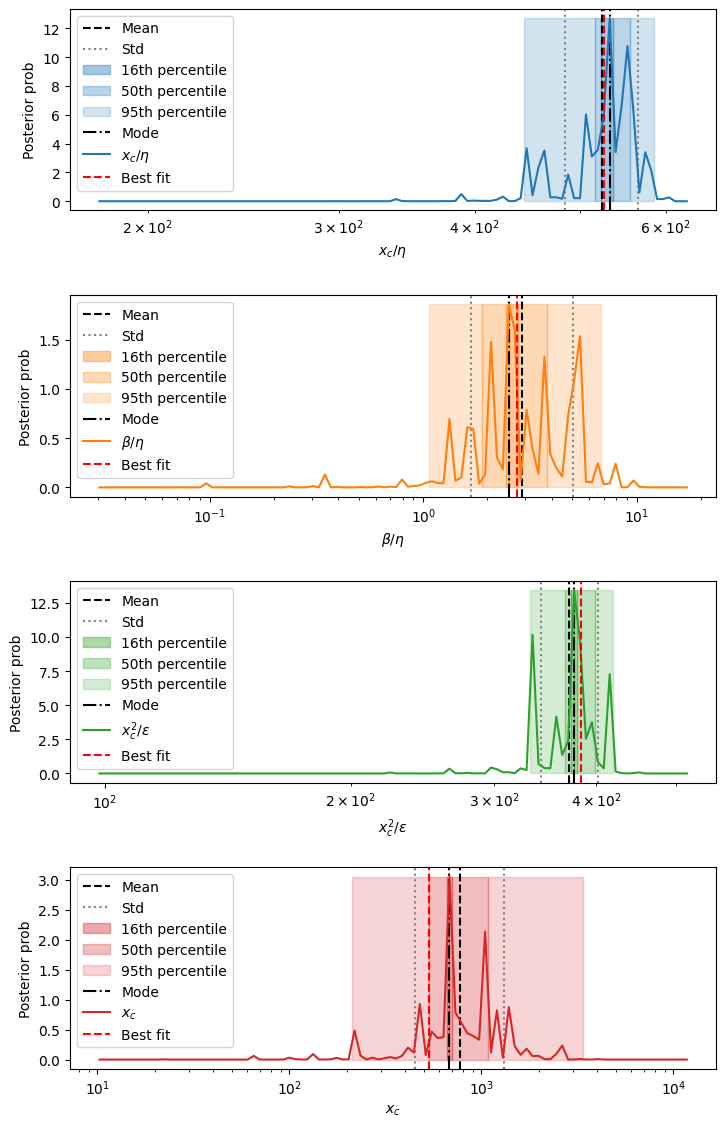

In [112]:
post1.plot_1d_posteriors(labels=["$x_c/\\eta$","$\\beta/\\eta$","$x_c^2/\\epsilon$","$x_c$"], truths=best_sample,scale='log')

Creating corner plot: 100%|██████████| 4/4 [00:08<00:00,  2.14s/it]


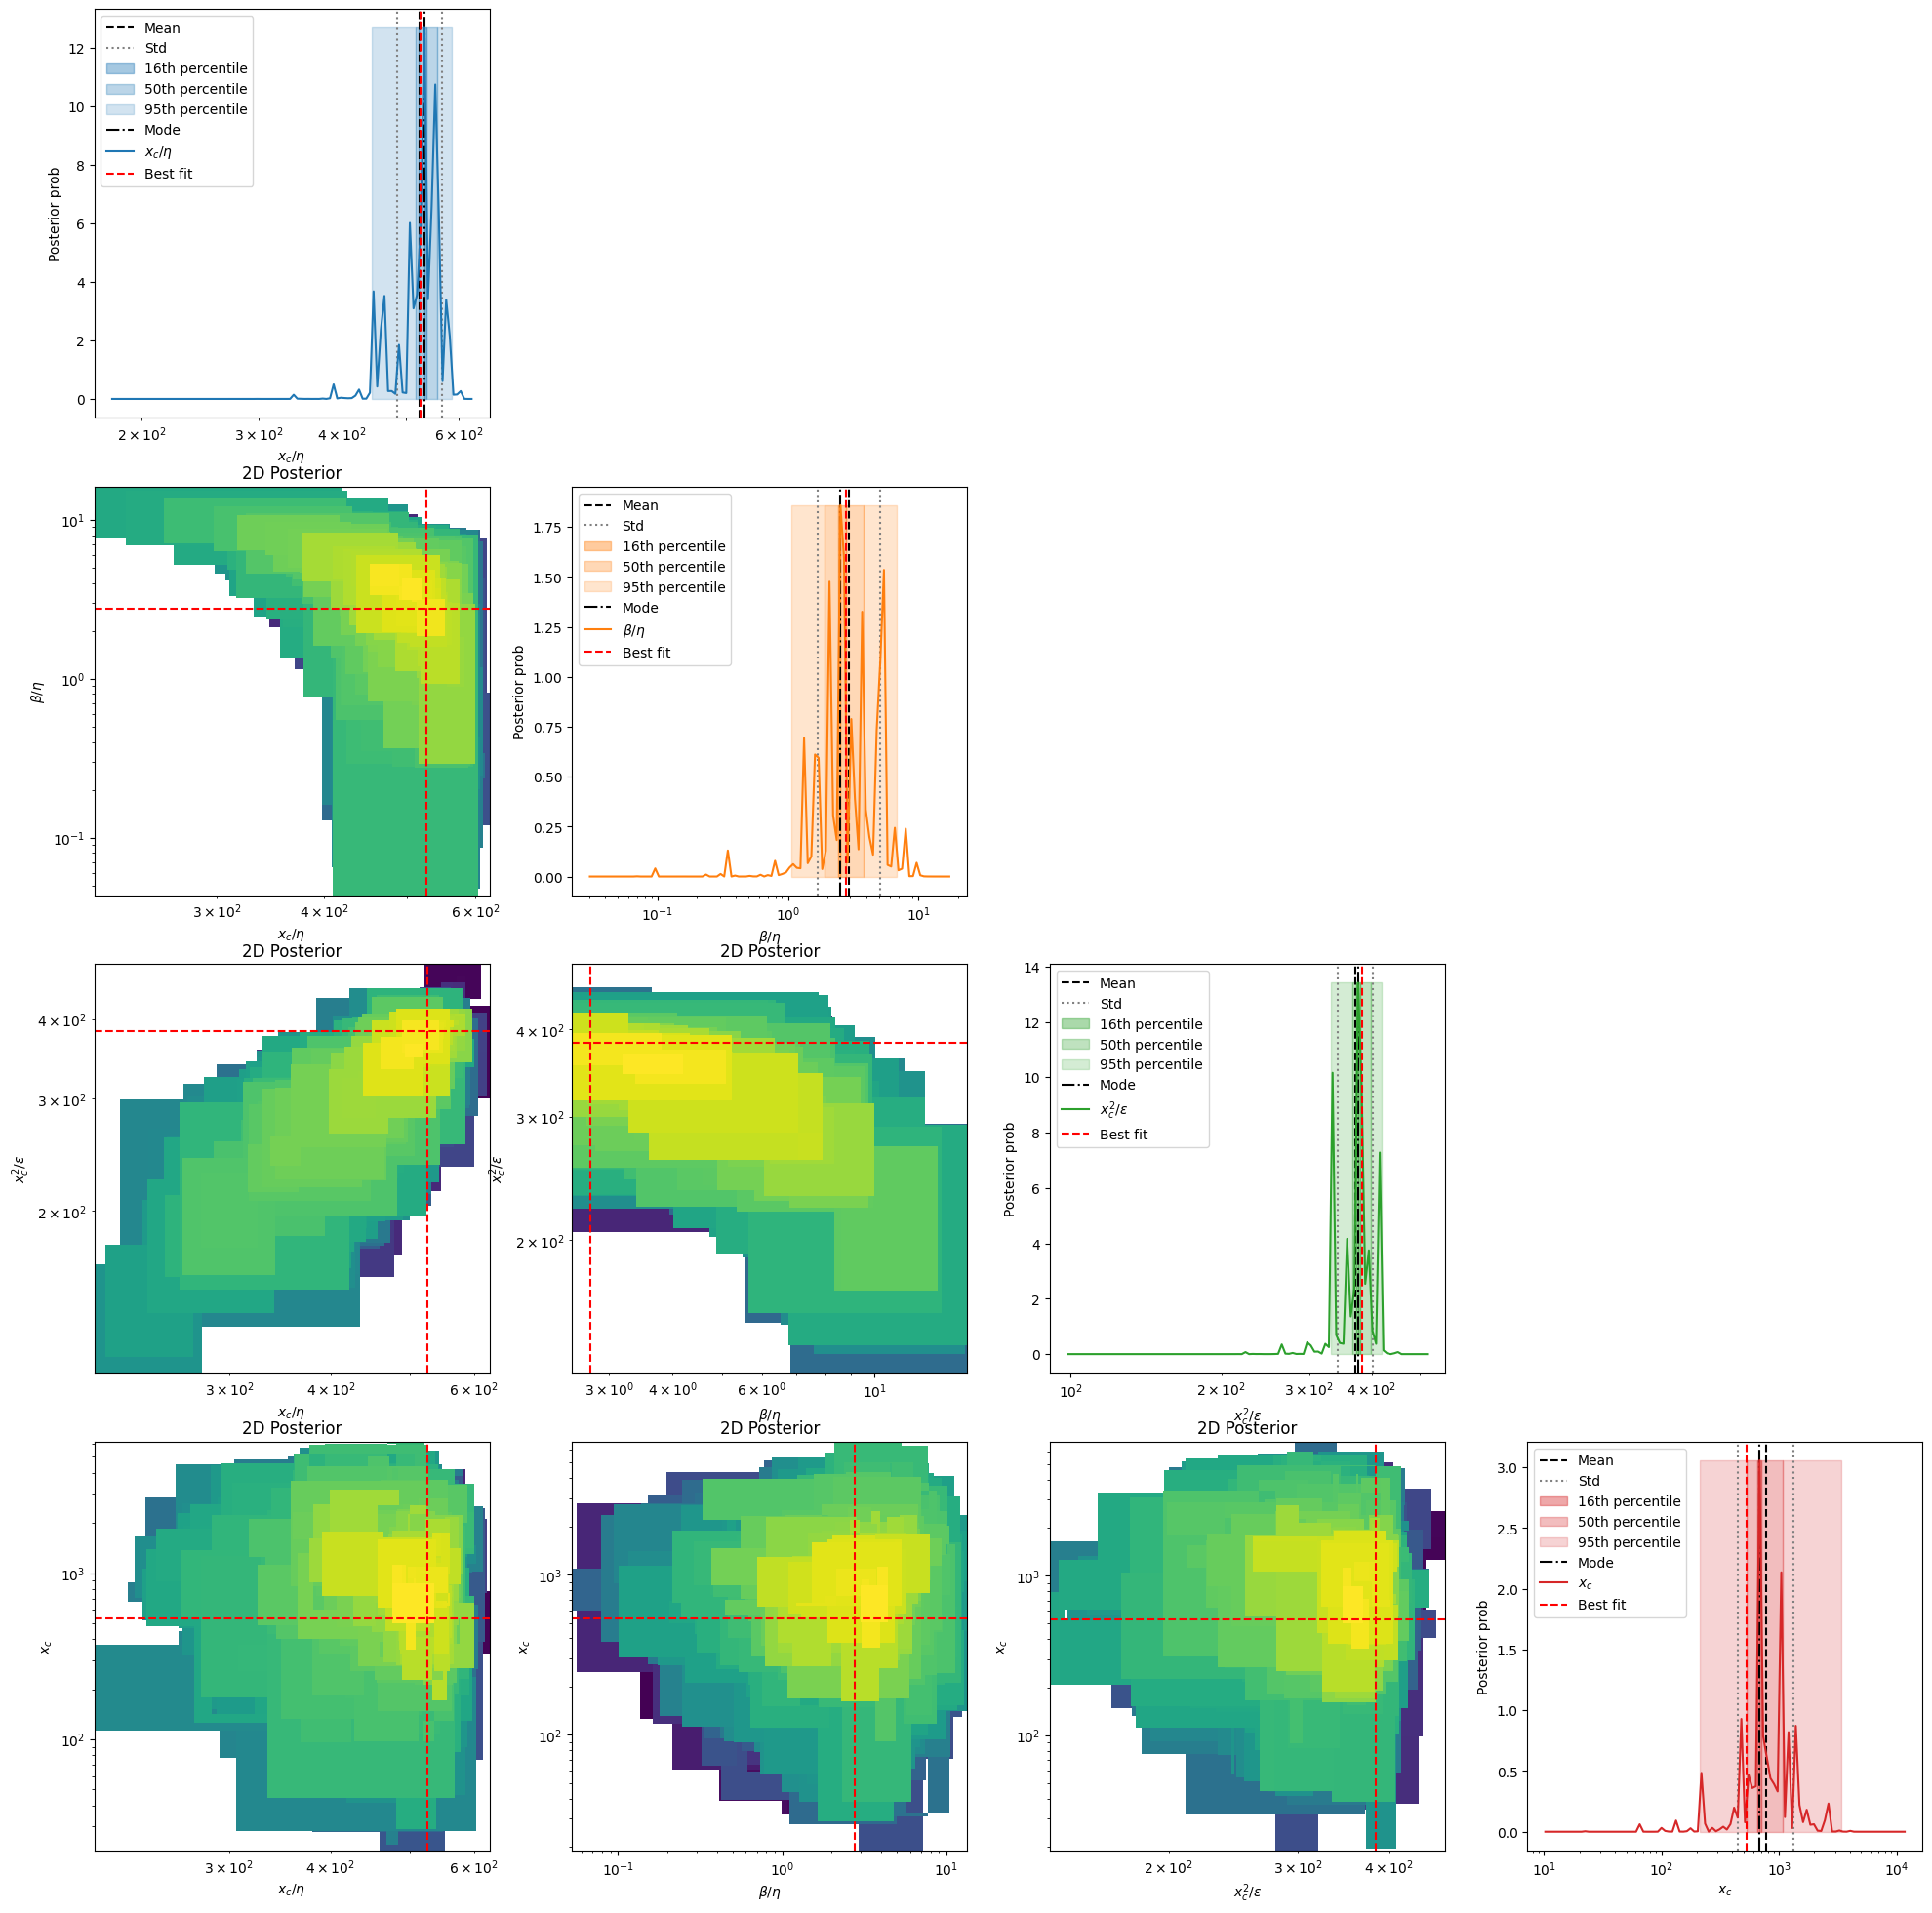

In [45]:
_=post1.corner_plot(labels=["$x_c/\\eta$","$\\beta/\\eta$","$x_c^2/\\epsilon$","$x_c$"], truths=best_sample,scale='log',show_ln_prob=False,norm='log',plot_type="pcolormesh")

In [11]:
#save post to file and load it to test
post1.save_to_file('test_post_data')
loaded_post = su.Posterior.load_from_file('test_post_data')

In [12]:
loaded_post.prior_lnprobs

array([0., 0., 0., ..., 0., 0., 0.])

In [6]:
print(np.sum(np.exp(post.posterior)))

1.0000000000000622


In [54]:
print(post.evidence)

-3616.4561132024323


In [50]:
theta, idx = post.get_mode(idx=True)
print(theta)
print(best_sample)

[506.60065839   3.6963921  357.20354012 682.09330032]
[526.10955619   2.76185155 382.96003714 534.33883471]


In [33]:
unique_samples = post.unique_samples
lnprobs_density = post.lnprobs_density
dthetas = post.dthetas

# Binary search for the closest bin
# Normalize unique_samples and sample for fair distance calculation
mins = unique_samples.min(axis=0)
maxs = unique_samples.max(axis=0)
print("mins", mins)
print("maxs", maxs)

mins [ 5.19629256 -3.49280631  4.59012019  2.32679999]
maxs [6.44155618 2.84340957 6.24635878 9.3715166 ]


In [62]:
print('idx', idx)
# theta = [506.60065839 ,  3.2,  400.20354012 ,2000.09330032]
dtheta = [ 100,100,100,110]
print(np.exp(post.get_probability_in_region(theta, dtheta)))

idx 6226
1.000000000000099


In [57]:
labels = np.array(["$x_c/\\eta$","$\\beta/\\eta$","$x_c^2/\\epsilon$","$x_c$"])

# Plot first 3D posterior
post.plot_posterior3D_interactive(
    features=[0, 1, 2],
    truths=np.log(best_sample),
    labels=labels,)


In [64]:
import plotly.graph_objects as go


labels = np.array(["$x_c/\\eta$","$\\beta/\\eta$","$x_c^2/\\epsilon$","$x_c$"])
# # Create 2x2 grid of 3D plots using plotly
# fig = make_subplots(
#     rows=2, cols=2,
#     specs=[[{'type': 'scene'}, {'type': 'scene'}],
#            [{'type': 'scene'}, {'type': 'scene'}]],
#     subplot_titles=('$x_c/\\eta$ vs $\\beta/\\eta$ vs $x_c^2/\\epsilon$', 
#                     '$x_c/\\eta$ vs $\\beta/\\eta$ vs $x_c$',
#                     '$x_c/\\eta$ vs $x_c^2/\\epsilon$ vs $x_c$',
#                     '$\\beta/\\eta$ vs $x_c^2/\\epsilon$ vs $x_c$')
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a figure with 2x2 subplots, each with a 3D scene
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'scene'}, {'type': 'scene'}],
           [{'type': 'scene'}, {'type': 'scene'}]],
    vertical_spacing=0.1,  # Add vertical spacing between rows
    horizontal_spacing=0.1  # Add horizontal spacing between columns
)

# Plot first 3D posterior
post.plot_posterior3D_interactive(
    features=[0, 1, 2],
    truths=np.log(best_sample),
    labels=labels,
    fig=fig,
    row=1, col=1
)

# Plot second 3D posterior
post.plot_posterior3D_interactive(
    features=[1, 2, 3],
    truths=np.log(best_sample),
    labels=labels,
    fig=fig,
    row=1, col=2
)



# Update the layout
fig.update_layout(
    title_text="3D Posterior Distributions",
    height=1000,  # Increase height
    width=1200,   # Increase width
    showlegend=True,
    scene=dict(
        aspectmode='cube'  # Make all scenes cubic
    ),
    scene2=dict(
        aspectmode='cube'
    ),
    scene3=dict(
        aspectmode='cube'
    ),
    scene4=dict(
        aspectmode='cube'
    )
)

# Show the figure
fig.show()




